# **Práctica 5: Introducción al análisis frecuencial de señales**
### Andrés Banquez- Melina Villada

**OBJETIVO**

Realizar un acercamiento a los conceptos fundamentales en el análisis frecuencial de señales, y su aplicación en el análisis de bioseñales

In [142]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import welch, iirnotch, freqz, filtfilt
from scipy.signal import find_peaks

**a.** Compruebe que los valores de las primeras cinco muestras son los mismos

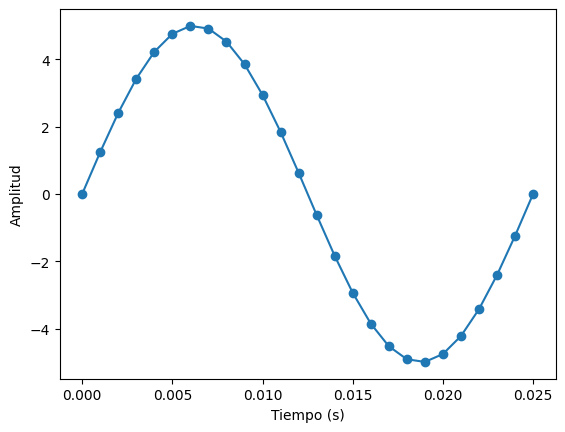

In [143]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

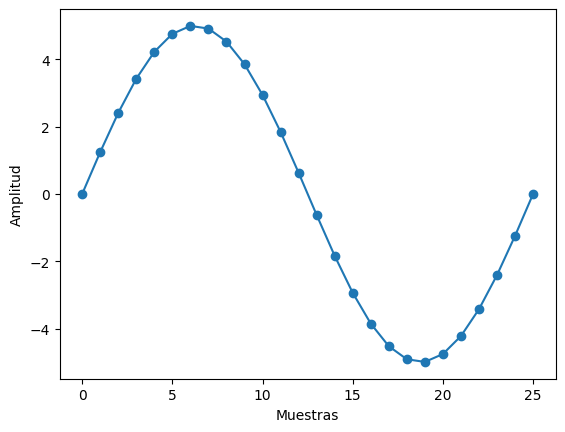

In [144]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

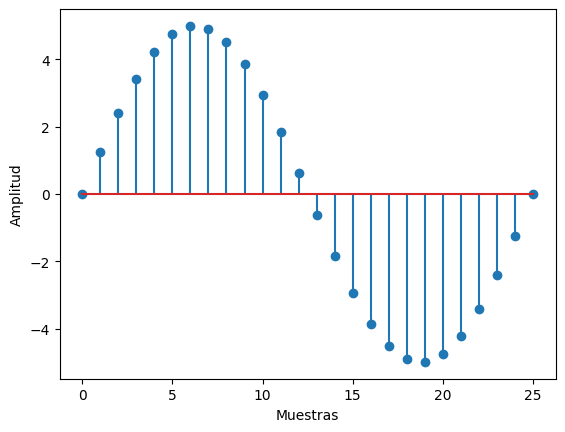

In [145]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

Comprobamos cuales son iguales y cuales no utilizando una función lambda.

In [146]:
list(map(lambda x: x[0] == x[1],[(x[i], x1[i]) for i in range(5)]))

[True, True, True, True, True]

Entonces podemos observar que los primeros 5 valores son iguales.

**b.** La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

In [147]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)
potencia10, rms10, energia10

(12.500000000000005, 3.535533905932738, 3125.0000000000014)

In [148]:
energia = sum(x1**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
n = np.arange(0, len(t10))
x10 = A*np.sin(2*np.pi*fo*n)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)
potencia10, rms10, energia10

(12.499999999999998, 3.5355339059327373, 3124.9999999999995)

**4.1.** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40,
80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal,
y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

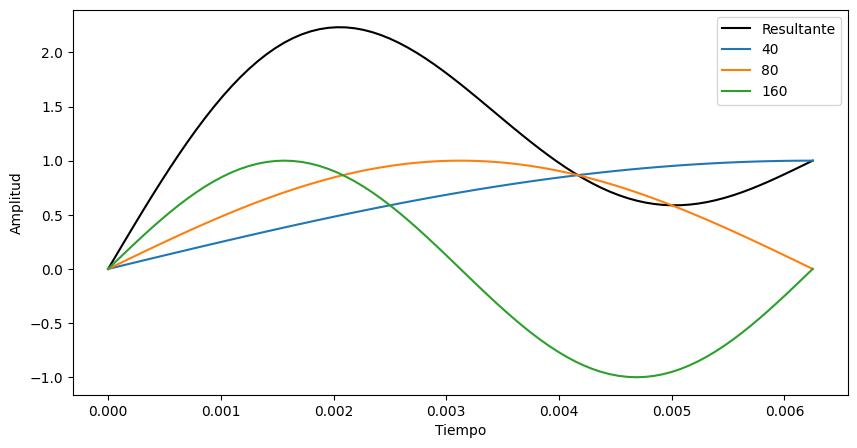

In [149]:
fmax = 160
fs = 80*fmax # elegimos 80 porque ya se nota correctamente el comportamiento de las senosoidales
t = np.arange(0, 1/fs+1/fmax, 1/fs)
n = np.arange(0, len(t))
x = np.sin(2*np.pi*40*t) + np.sin(2*np.pi*80*t) + np.sin(2*np.pi*160*t)
plt.figure(figsize=(10, 5))
plt.plot(t, x, color='black')
plt.plot(t, np.sin(2*np.pi*40*t))
plt.plot(t, np.sin(2*np.pi*80*t))
plt.plot(t, np.sin(2*np.pi*160*t))
plt.legend(['Resultante', 40, 80, 160])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

**4.2.** Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos
de la señal). (10%)


In [150]:
Ts = 1/fs
t = np.arange(0, 25*(1/fs+1/fmax), 1/fs)
x = np.sin(2*np.pi*40*t) + np.sin(2*np.pi*80*t) + np.sin(2*np.pi*160*t)

Se pidieron 10 periodos de la señal, pero para observar de mejor manera los picos de la fft era necesario aumentar el numero de periodos, se adjunta una imagen con 10 y luego se mostrará con 25 sin modificar la frecuencia de muestreo.
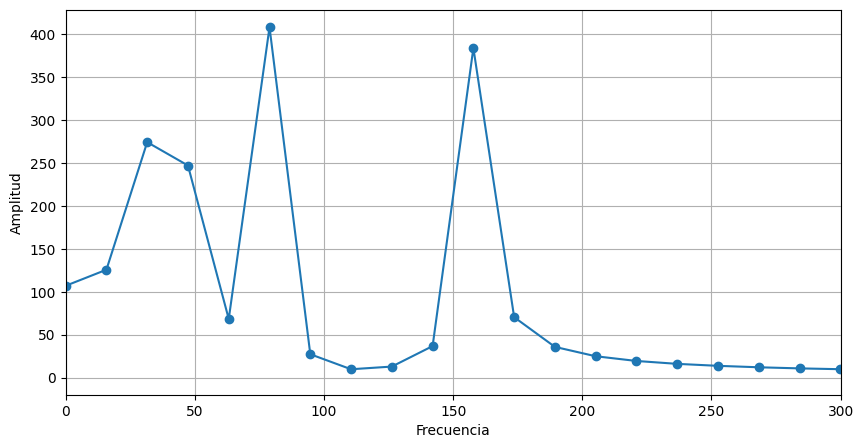

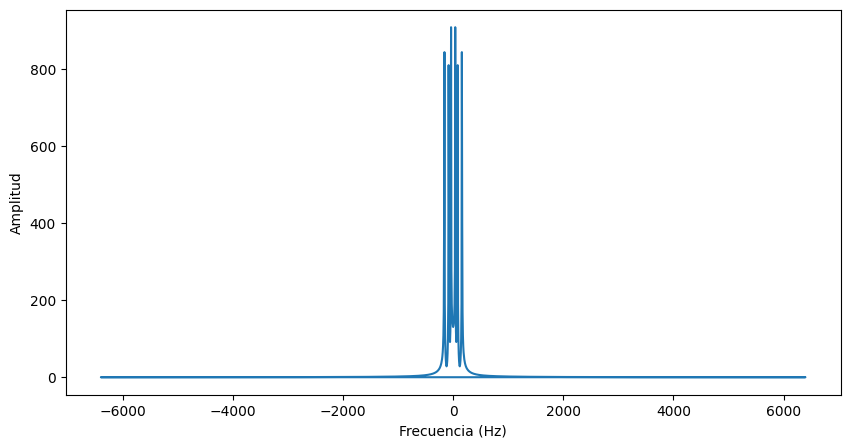

In [151]:
ffte = fft(x)
N = len(ffte)
F = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 5))
plt.plot(F,abs(ffte))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()


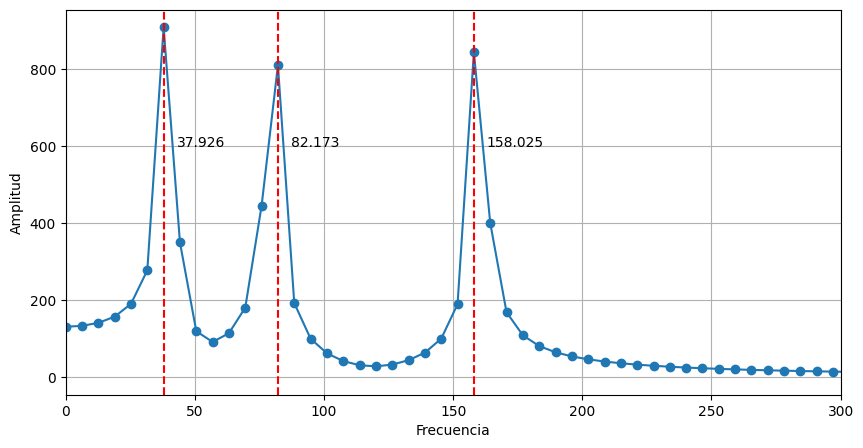

In [152]:
nMitad = int(np.ceil(N/2))
plt.figure(figsize=(10, 5))
plt.plot(F[:nMitad], abs(ffte[:nMitad]), '-o')
plt.grid()
plt.xlim([0,300])
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
frecuencias = [F[:nMitad][i] for i in range(len(F[:nMitad])) if abs(ffte[:nMitad])[i] > 600]
for i in range(len(frecuencias)):
    plt.axvline(x=frecuencias[i], color='r', linestyle='--')
    plt.text(frecuencias[i]+5, 600, str(round(frecuencias[i],3)), color='black')
plt.show()

**4.3.** Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.
Aplíquelo a la señal anterior. (10%)

Se utiliza la ifft de scipy, que viene en el modulo fftpack (scipy.fftpack.ifft) o en el modulo fft (scipy.fft.ifft)

c:\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


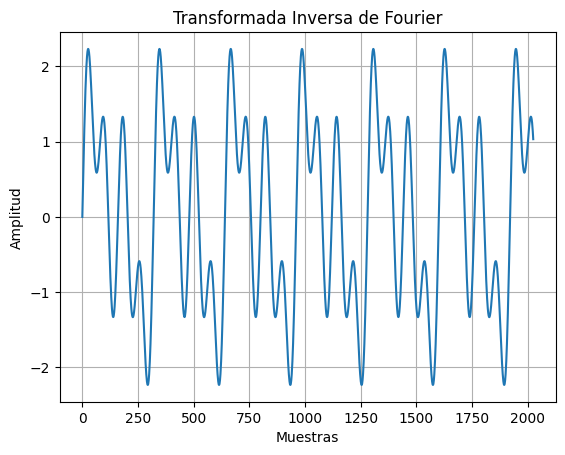

In [153]:
plt.figure()
plt.plot(range(len(ifft(ffte))),ifft(ffte))
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Transformada Inversa de Fourier')
plt.grid()
plt.show()

4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%)
Extraiga de manera similar cada una de las componentes de la señal.

C:\Users\andre\AppData\Local\Temp\ipykernel_3164\3412144742.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13];


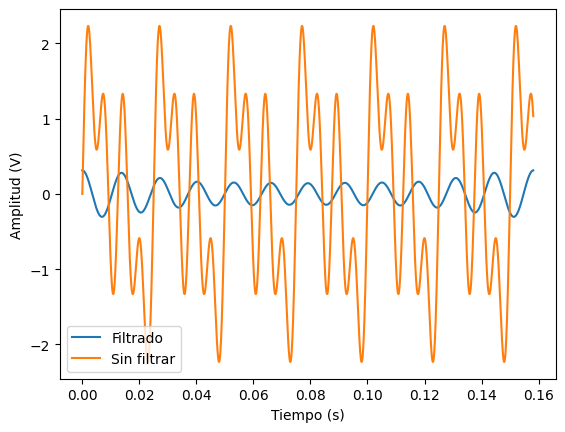

In [154]:
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
# Las siguientes 2 lineas la agregramos nosotros
ax.plot(t, np.fft.ifft(F1))
plt.legend(['Filtrado', 'Sin filtrar'])
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()

Ahora tambien extraemos los picos de frecuencia, estos picos se pueden obtener por fft, pero ya se obtuvieron antes en el analisis welch tambien:

In [155]:
frecuencias

[37.925925925925924, 82.17283950617283, 158.02469135802468]

[(75.8893280632411, 909.5499912491897),
 (164.4268774703557, 810.9941158480166),
 (316.2055335968379, 844.8151550701871)]

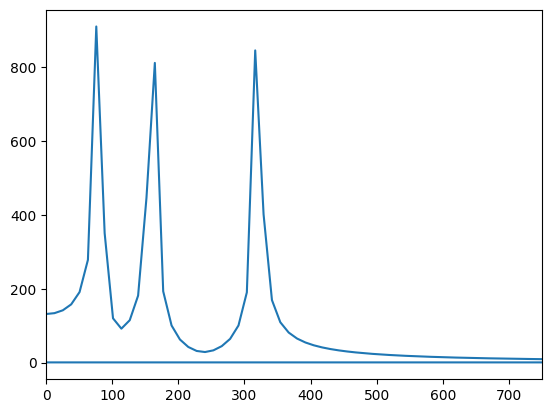

In [156]:
FMag = np.abs(F1[:len(F1)//2])
freqs = np.fft.fftfreq(len(FMag), Ts)
freqsPeaks = find_peaks(abs(FMag), height = 200)
plt.figure()
plt.plot(freqs, np.abs(FMag))
plt.xlim([0, 750])
Picos = [(freqs[i], FMag[i]) for i in freqsPeaks[0]]
Picos

C:\Users\andre\AppData\Local\Temp\ipykernel_3164\299787287.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = F1[i]


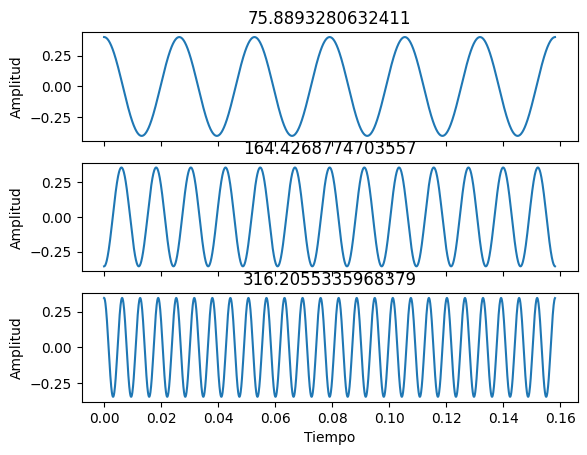

In [157]:
fig, ax = plt.subplots(3,1, sharex = True)
for j, i in enumerate(freqsPeaks[0]):
    X = np.zeros((len(F1)))
    X[i] = F1[i] 

    x = np.fft.ifft(X)
    
    ax[j].plot(t, np.real(x))
    ax[j].set_ylabel('Amplitud')
    ax[j].set_title(freqs[i])
    
ax[2].set_xlabel('Tiempo')
plt.show()

Tras agregar la linea podemos decir con certeza que hay un filtro, y esto podemos también decirlo analizando el código porque se selecciona unicamente un rango de la transformada para posteriormente hacer la inversa de este fragmento y graficarlo.

En la grafica podemos notar la señal en 2 estados, prefiltrado y postfiltrado, ambas en el tiempo. A continuación mostramos los valores de amplitud que fueron tomados de para hacer la ifft.

In [158]:
F2[9:13]


array([ 26.51040727,  75.73898596, 146.07635698, 385.47968466])

**4.5** El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%)

Primero importamos la señal.

In [159]:
ecg = sio.loadmat('senecg.mat')
ecg = ecg['ECG'].flatten()
ecg.shape

(1250,)

Ahora que conocemos cuantos datos hay podemos saber que hay 5 segundos de señal y conocemos su frecuencia de muestreo por lo que podemos crear el vector tiempo.

In [160]:
fs = 250
t = np.linspace(0, ecg.shape[0] / fs, ecg.shape[0])
t.shape

(1250,)

In [161]:
t

array([0.00000000e+00, 4.00320256e-03, 8.00640512e-03, ...,
       4.99199359e+00, 4.99599680e+00, 5.00000000e+00])

Una vista al ECG.

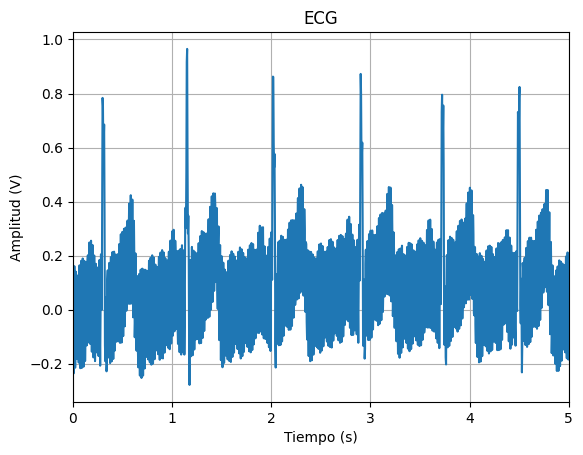

In [162]:
plt.figure()
plt.plot(t, ecg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.xlim([0, 5])
plt.title('ECG')
plt.grid()
plt.show()

Ahora miramos su distribución de potencias (welch).

Seleccionamos un valor alto de nperseg (longitud de segmento) porque este nos permite entonces al ser alto obtener una resolución mayor de las frecuencias, que permite conocer mejor en cuales valores hay mayores distribuciones de potencia. En cambio no seleccionamos un valor de solapamiento demasiado alto porque este puede opacar aquellas frecuencias importantes que podriamos necesitar saber si están ahi, mientras nos permite ver aun los altos picos de potencia.

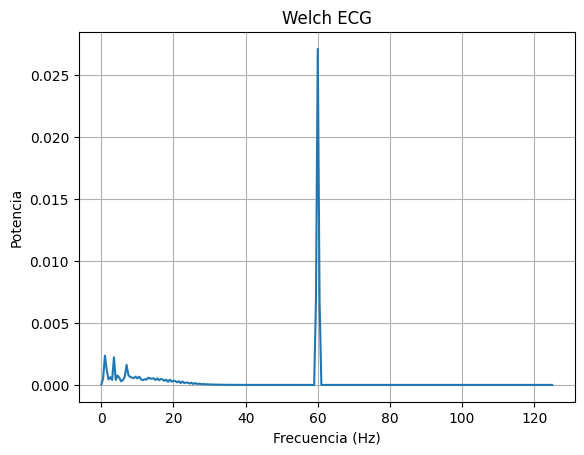

In [163]:
f, p = welch(ecg, fs, window='hann', nperseg=500, noverlap=50)
plt.figure()
plt.plot(f, p)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Welch ECG')
plt.grid()
plt.show()

Se puede observar que SI necesita un filtrado, especificamente en los 60hz que sería la frecuencia de la red electrica, utilizamos la función para filtros de scipy.

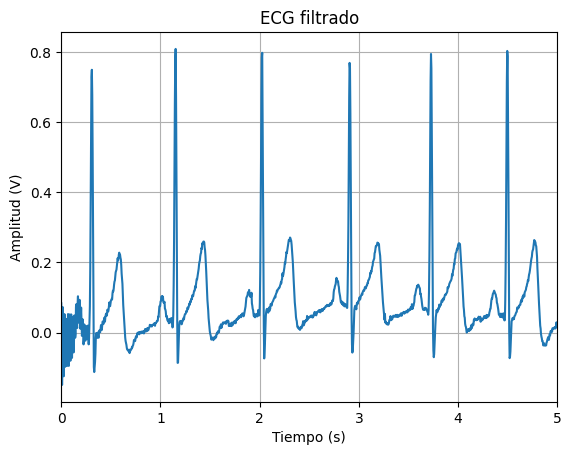

In [164]:
b, a = iirnotch(60, 30, fs)
ecg_notch = filtfilt(b, a, ecg)
plt.plot(t,ecg_notch)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.xlim([0, 5])
plt.title('ECG filtrado')
plt.grid()
plt.show()

Podemos observar como la señal ahora se ve mucho mas limpia, se notan mas facilmente los picos PQRST.

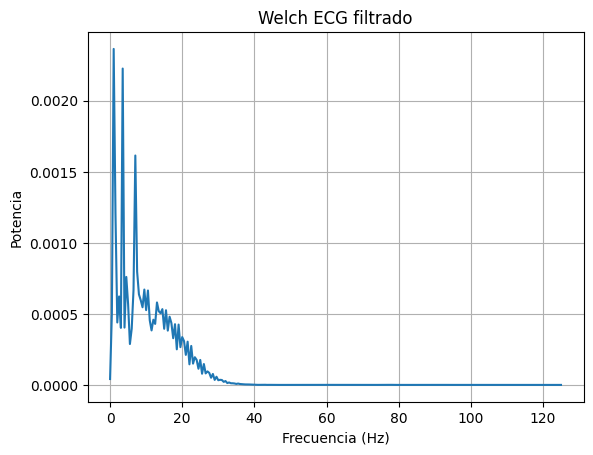

In [165]:
f, p = welch(ecg_notch, fs, window='hann', nperseg=500, noverlap=50)
plt.figure()
plt.plot(f, p)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Welch ECG filtrado')
plt.grid()
plt.show()

Tambien ahora podemos ver las frecuencias de mejor manera posterior al filtrado.

**4.6**. Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%)

En la practica 3 no se encontró diferencias en ningun canal, entonces se elijen al azar, importamos uno para parkinson y uno para sano.

In [166]:
sano = sio.loadmat('C020_EP_reposo.mat')
parkinson = sio.loadmat('P016_EP_reposo.mat')

In [167]:
sano = sano['data']
parkinson = parkinson['data']
sano.shape, parkinson.shape

((8, 2000, 166), (8, 2000, 150))

Escogemos 2 canales aleatorios, 3 y 7.

In [168]:
sano = sano.reshape(sano.shape[0],sano.shape[1]*sano.shape[2])
parkinson = parkinson.reshape(parkinson.shape[0],parkinson.shape[1]*parkinson.shape[2])
sano3 = sano[3, :]
parkinson3 = parkinson[3, :]
sano7 = sano[7, :]
parkinson7 = parkinson[7, :]


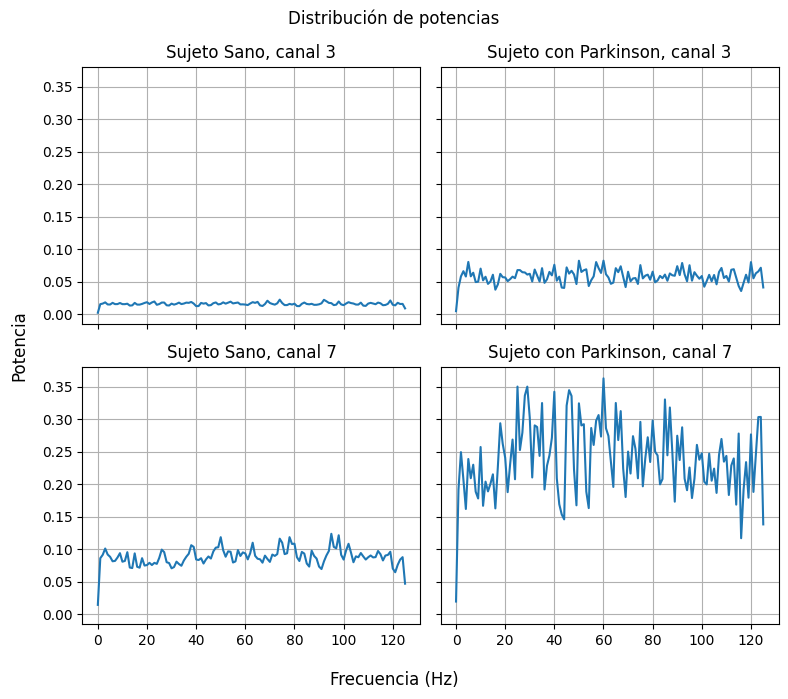

In [169]:
fig, ax = plt.subplots(2, 2, figsize=(8, 7), sharex = True, sharey = True)
sano3welch = welch(sano3, fs, window='hann', nperseg=250, noverlap=100)
parkinson3welch = welch(parkinson3, fs, window='hann', nperseg=250, noverlap=100)
sano7welch = welch(sano7, fs, window='hann', nperseg=250, noverlap=100)
parkinson7welch = welch(parkinson7, fs, window='hann', nperseg=250, noverlap=100)
ax[0,0].plot(sano3welch[0], sano3welch[1])
ax[0,1].plot(parkinson3welch[0], parkinson3welch[1])
ax[1,0].plot(sano7welch[0], sano7welch[1])
ax[1,1].plot(parkinson7welch[0], parkinson7welch[1])
ax[0, 0].set_title('Sujeto Sano, canal 3')
ax[1, 0].set_title('Sujeto Sano, canal 7')
ax[0, 1].set_title('Sujeto con Parkinson, canal 3')
ax[1, 1].set_title('Sujeto con Parkinson, canal 7')
for axs in ax.flat:
    axs.grid(True)
fig.suptitle('Distribución de potencias')
fig.supxlabel('Frecuencia (Hz)')
fig.supylabel('Potencia')
plt.tight_layout()
plt.show()

Se escogió 250 y 100 porque estos valores permitian ver los picos de manera correcta con una buena resolución.

Los gráficos de los espectros de potencia muestran diferencias en las distribuciones de potencia entre sujetos sanos y pacientes con Parkinson. Esto puede indicar alteraciones en la actividad cerebral debido a la enfermedad. Se observa que las señales de pacientes con Parkinson tienden a tener picos de potencia a diferentes frecuencias en comparación con los sujetos sanos, lo que sugiere posibles biomarcadores de la enfermedad.

## **Conclusiones**

* Al analizar los espectros de potencia, es posible detectar anomalías en la actividad neuronal que no son evidentes en el dominio temporal. Esto es crucial para una detección temprana de la enfermedad de Parkinson.
* Al realizar la Transformada de Fourier en señales de ECG, se pueden identificar frecuencias dominantes que corresponden a los ciclos cardíacos. Por ejemplo, en un ECG normal, el análisis espectral revelará un pico dominante en las frecuencias bajas como se evidenció, que está relacionado con la frecuencia cardíaca.

* El método de Welch es esencial para mejorar la calidad y precisión de la estimación espectral en señales ruidosas y no estacionarias como el EEG y ECG. Ayuda a generar espectros más suaves, menos sensibles al ruido y mejor interpretados clínicamente, lo cual es crucial para el diagnóstico y análisis de bioseñales.

## **Bibliografía**

Mj, G. (2015). TEOREMA DE PARSEVAL. Esimeculhuacan. https://www.academia.edu/17388785/TEOREMA_DE_PARSEVAL